# Car Price Prediction Dataset Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/car_price_prediction_.csv')

## 1 Dataset Exploration Summary

### Dataset Overview 

- This dataset contains 2,500 car listings with key fields such as price, mileage, year, brand, model, engine size, fuel type, transmission, and condition.
- The data is clean (no missing values) and structured, making it suitable for analysis.

### Why I Selected This Dataset
- Has realistic numerical patterns compared to the other explored datasets.
- Includes multiple meaningful predictors of price (mileage, year, engine size, condition).
- Easier to analyze than text-heavy datasets like IMDB and more trustworthy than synthetic AI Jobs data.

### Initial Analysis Focus
- Identify which factors have the strongest impact on car price.
- Compare depreciation patterns across different brands.

## 2 Data Quality Check

In [5]:
# 2.1 Missing Values Check
df.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

All columns contain 0 missing values.
The dataset is complete and does not require any missing-value imputation at this stage.

In [6]:
# 2.2 Duplicate Rows Check
df.duplicated().sum()

np.int64(0)

The dataset contains 0 duplicate rows.
No deduplication is required.

In [7]:
# 2.3 Category Consistency Check
for col in df.select_dtypes(include='object'):
    print(f"=== {col} ===")
    print(df[col].unique(), "\n")

=== Brand ===
['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota'] 

=== Fuel Type ===
['Petrol' 'Electric' 'Diesel' 'Hybrid'] 

=== Transmission ===
['Manual' 'Automatic'] 

=== Condition ===
['New' 'Used' 'Like New'] 

=== Model ===
['Model X' '5 Series' 'A4' 'Model Y' 'Mustang' 'Q7' 'Q5' 'Civic'
 'Explorer' 'Model 3' 'Fiesta' 'X3' 'GLA' 'A3' 'X5' 'C-Class' 'E-Class'
 'CR-V' 'Camry' 'Accord' 'GLC' 'Corolla' 'Fit' 'Model S' 'Prius'
 '3 Series' 'RAV4' 'Focus'] 



All categorical fields show clean and consistent category labels.
There are no spelling inconsistencies, no duplicated variants, and no formatting issues across “Brand”, “Fuel Type”, “Transmission”, “Condition”, and “Model”.
No corrections are required at this stage.

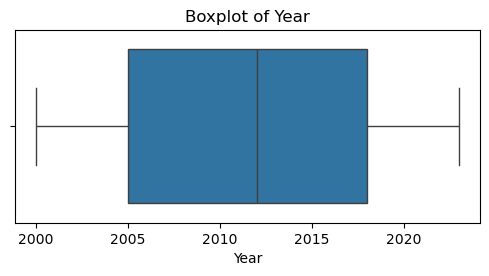

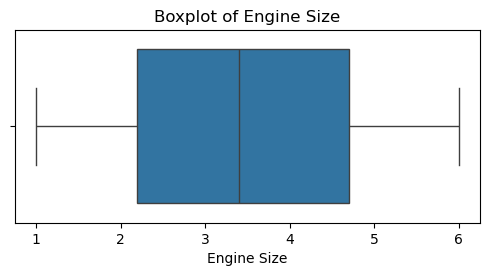

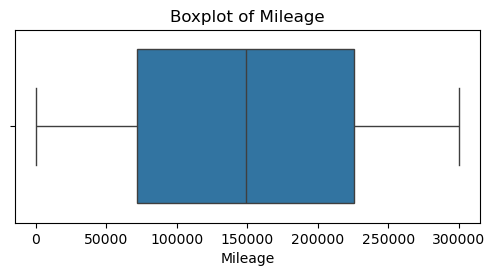

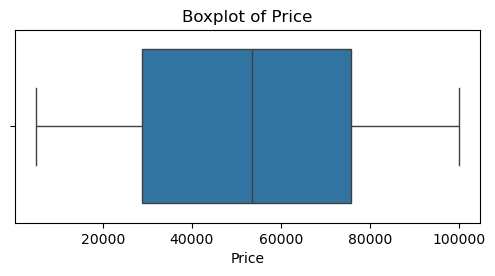

In [8]:
# 2.4 Numerical Outlier Check (Boxplots)
num_cols = ['Year', 'Engine Size', 'Mileage', 'Price']

for col in num_cols:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

The boxplots for Year, Engine Size, Mileage, and Price show no extreme outliers outside the whiskers.
All values fall within realistic ranges for used cars:

Year ranges from 2000–2023 (reasonable for modern vehicles).

Engine Size spans 1.0–6.0 liters (typical for passenger cars).

Mileage ranges from 15 to ~300,000 km (normal for used cars; high mileage is expected, not an error).

Price falls between \$5,000 and \$100,000 (reasonable across different brands/models).

In [11]:
# 2.5 Logical Consistency Check
# Old cars mileage check
df[df['Year'] < 2005].sort_values(by='Mileage').head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2256,2257,Audi,2004,1.3,Electric,Automatic,244,Like New,90253.66,Q7
898,899,Tesla,2003,2.5,Diesel,Automatic,1919,Like New,61313.37,Model 3
487,488,Toyota,2003,4.1,Electric,Manual,2419,Used,41275.26,Prius
1523,1524,Toyota,2004,2.0,Petrol,Manual,2994,New,24368.44,Corolla
862,863,Audi,2003,5.7,Petrol,Automatic,3060,Used,83183.16,A4


Several vehicles manufactured before 2005 show unrealistically low mileages (e.g., 244 km, 1,919 km, 2,419 km).
For 20-year-old cars, such low mileage is not plausible in real-world scenarios.
These records appear to be synthetic or logically inconsistent, and they should be noted as anomalies during the cleaning stage.

Also, the dataset contains cars labeled as Tesla with a manufacturing year of 2003, which is not historically possible, since Tesla did not mass-produce commercial vehicles until 2008.
This indicates a brand–year inconsistency and suggests that the dataset contains synthetic or logically inaccurate entries.

In [12]:
# New cars mileage check
df[df['Year'] > 2020].sort_values(by='Mileage', ascending=False).head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
1949,1950,Honda,2022,2.6,Petrol,Automatic,298962,Used,31874.18,Civic
991,992,Tesla,2021,6.0,Electric,Automatic,296508,New,36672.73,Model X
872,873,BMW,2021,4.8,Petrol,Automatic,295759,Used,18781.21,X3
1175,1176,Tesla,2023,3.3,Petrol,Manual,295531,Like New,88851.63,Model X
215,216,Toyota,2023,5.4,Petrol,Manual,294458,Used,19655.11,Corolla


Vehicles from 2021–2023 show extremely high mileages (~295,000 km), which is unrealistic for cars that are only 1–3 years old.
Such mileage levels are inconsistent with typical vehicle usage patterns and indicate logical anomalies in the dataset.
These entries should be flagged as unrealistic cases during data cleaning.

## 3 Data Cleaning

### 3.1 Missing Value Handling 
- All columns contain 0 missing values. No imputation is required for this dataset.
### 3.2 Duplicate Handling 
- No duplicate rows were found. No deduplication is required.
### 3.3 Category Cleaning
- All category fields contain consistent labels. No correction is needed.
### 3.4 Numerical Value Outlier Cleaning
- There are no obvious outliers among numerical values

In [21]:
#3.5.1 Flag logical inconsistencies
df_clean = df.copy()

df_clean['Anomaly'] = (
    ((df_clean['Brand'] == 'Tesla') & (df_clean['Year'] < 2008)) |         # Tesla didn't exist pre-2008
    ((df_clean['Year'] > 2020) & (df_clean['Mileage'] > 200000)) |        # New cars with extreme mileage
    ((df_clean['Year'] < 2010) & (df_clean['Mileage'] < 10000))           # Old cars with unrealistically low mileage
)

Identify and flag logically inconsistent records, such as impossible brand–year combinations or unrealistic mileage values. These records are not removed but marked for awareness.

In [20]:
# 3.5.2 View anomalies
df_clean[df_clean['Anomaly'] == True].head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Anomaly
10,11,Tesla,2001,1.8,Diesel,Automatic,298875,Like New,58872.60,Model 3,True
13,14,Audi,2023,5.4,Electric,Automatic,263894,Like New,70193.74,Q7,True
27,28,Honda,2022,4.4,Diesel,Manual,204541,New,41033.39,Accord,True
35,36,Tesla,2004,3.2,Petrol,Manual,171840,Like New,29822.30,Model 3,True
37,38,BMW,2021,3.2,Diesel,Automatic,282346,New,40155.51,5 Series,True


In [22]:
# 3.6 Count anomalies
df_clean['Anomaly'].sum()

np.int64(276)

A total of 276 records (≈11%) were flagged as logically inconsistent.
These include:

Tesla models with manufacturing years earlier than 2008

Newer cars (2021–2023) with extremely high mileage (>200,000 km)

Older cars (before 2010) with unrealistically low mileage (<10,000 km)

Since the dataset appears to be synthetic rather than real dealership data, these anomalies were not removed, but were retained with an explicit anomaly flag to maintain transparency in downstream analysis.

## 4 Exploratory Data Analysis